# Analyse défenseurs — Notebook
Ce notebook calcule des KPI **par 90 minutes** pour les défenseurs et génère des visualisations basiques.
_Remplis les TODO si des colonnes portent des noms différents dans ton CSV._


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# Chargement
CSV_PATH = r"../normalized_data/assembled_data_DF_normalized.csv"
df = pd.read_csv(CSV_PATH)
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MainPos,MP,...,Fls_per_90,Fld_per_90,Min%_per_90,Compl_per_90,Subs_per_90,PPM_per_90,onG_per_90,onGA_per_90,+/-_per_90,+/-90_per_90
0,602,Aaron Cresswell,eng ENG,"DF,FW",West Ham,eng Premier League,33.0,1989.0,DF,11,...,0.412844,0.619266,2.621560,0.412844,1.444954,0.206422,1.238532,2.270642,-1.032110,-0.212615
1,1138,Aaron Hickey,sct SCO,DF,Brentford,eng Premier League,21.0,2002.0,DF,9,...,1.262272,2.019635,2.625526,0.252454,0.000000,0.140112,1.262272,1.514727,-0.252454,-0.031557
2,2741,Aaron Wan-Bissaka,cd COD,DF,Manchester Utd,eng Premier League,25.0,1997.0,DF,22,...,0.859551,0.455056,2.629213,0.808989,0.101124,0.066742,1.516854,1.719101,-0.202247,-0.010112
3,1631,Aarón Martín,es ESP,DF,Genoa,it Serie A,26.0,1997.0,DF,22,...,1.504360,1.111919,2.629360,0.457849,0.327035,0.083067,1.438953,1.308140,0.130814,0.008503
4,2532,Abakar Sylla,ci CIV,DF,Strasbourg,fr Ligue 1,20.0,2002.0,DF,22,...,1.506696,0.200893,2.943080,0.803571,0.150670,0.059263,1.205357,1.607143,-0.401786,-0.020089


## KPI 1 — Tacles réussis /90
**Pourquoi**: mesure l'efficacité au sol. **Interprétation**: >3/90 = très actif.


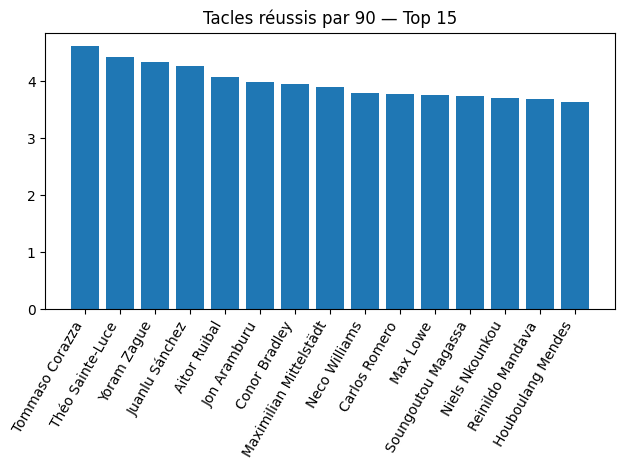

In [5]:
# TODO: adapte le nom si nécessaire
col_tkl90 = [c for c in df.columns if 'tkl' in c.lower() and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
kpi_tackles = df[col_tkl90[0]] if col_tkl90 else None
df_kpi1 = df[['Player','Pos','Squad'] + col_tkl90] if col_tkl90 else df[['Player','Pos','Squad']]
df_kpi1 = df_kpi1.sort_values(col_tkl90[0], ascending=False).head(15) if col_tkl90 else df_kpi1
plt.figure()
plt.bar(df_kpi1['Player'], df_kpi1[col_tkl90[0]])
plt.xticks(rotation=60, ha='right')
plt.title('Tacles réussis par 90 — Top 15')
plt.tight_layout()

## KPI 2 — Interceptions /90
**Pourquoi**: activité d'anticipation.


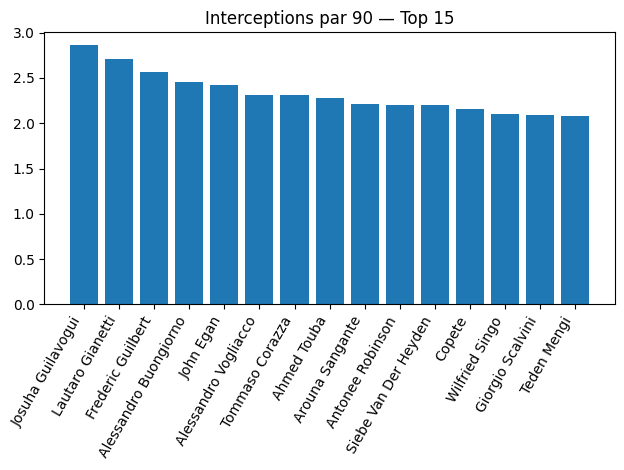

In [6]:
col_int90 = [c for c in df.columns if 'int' in c.lower() and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
df_kpi2 = df[['Player','Pos','Squad'] + col_int90] if col_int90 else df[['Player','Pos','Squad']]
df_kpi2 = df_kpi2.sort_values(col_int90[0], ascending=False).head(15) if col_int90 else df_kpi2
plt.figure()
plt.bar(df_kpi2['Player'], df_kpi2[col_int90[0]])
plt.xticks(rotation=60, ha='right')
plt.title('Interceptions par 90 — Top 15')
plt.tight_layout()

## KPI 3 — Duels aériens gagnés %
**Pourquoi**: domination aérienne, crucial pour stoppeurs.


In [7]:
cand_pct = [c for c in df.columns if ('aerial' in c.lower() or 'duel' in c.lower()) and ('%' in c or 'pct' in c.lower() or 'rate' in c.lower())]
if cand_pct:
    df_kpi3 = df[['Player','Pos','Squad'] + cand_pct]
    top = df_kpi3.sort_values(cand_pct[0], ascending=False).head(15)
    plt.figure()
    plt.bar(top['Player'], top[cand_pct[0]])
    plt.xticks(rotation=60, ha='right')
    plt.title('Duels aériens gagnés (%) — Top 15')
    plt.tight_layout()
else:
    print('Aucune colonne % de duels aériens détectée. Ajoute/renomme si besoin.')

Aucune colonne % de duels aériens détectée. Ajoute/renomme si besoin.


## KPI 4 — Dégagements /90
**Pourquoi**: gestion du danger dans la surface et dans le dos.


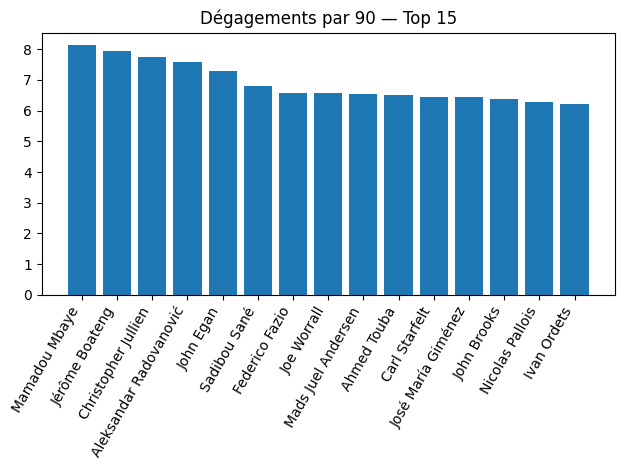

In [8]:
col_clr90 = [c for c in df.columns if ('clr' in c.lower() or 'clear' in c.lower()) and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
if col_clr90:
    top = df.sort_values(col_clr90[0], ascending=False).head(15)
    plt.figure()
    plt.bar(top['Player'], top[col_clr90[0]])
    plt.xticks(rotation=60, ha='right')
    plt.title('Dégagements par 90 — Top 15')
    plt.tight_layout()
else:
    print('Pas de colonne dégagements/90 détectée.')

## KPI 5 — Fautes commises /90
**Pourquoi**: discipline et risque de coup-franc/danger.


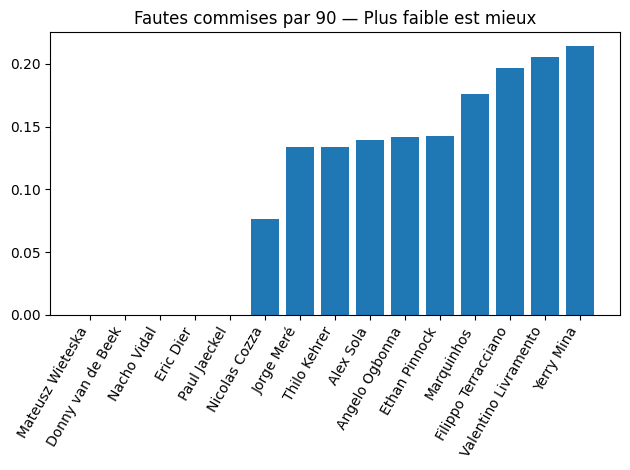

In [9]:
col_fouls90 = [c for c in df.columns if ('foul' in c.lower() or 'fls' in c.lower()) and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
if col_fouls90:
    low = df.sort_values(col_fouls90[0], ascending=True).head(15)
    plt.figure()
    plt.bar(low['Player'], low[col_fouls90[0]])
    plt.xticks(rotation=60, ha='right')
    plt.title('Fautes commises par 90 — Plus faible est mieux')
    plt.tight_layout()
else:
    print('Pas de colonne fautes/90 détectée.')

## KPI 6 — Pressions réussies /90
**Pourquoi**: capacité à récupérer haut ou casser la relance.


In [10]:
cand_press = [c for c in df.columns if 'press' in c.lower() and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
if cand_press:
    top = df.sort_values(cand_press[0], ascending=False).head(15)
    plt.figure()
    plt.bar(top['Player'], top[cand_press[0]])
    plt.xticks(rotation=60, ha='right')
    plt.title('Pressions réussies par 90 — Top 15')
    plt.tight_layout()
else:
    print('Pas de colonne pressions/90 détectée.')

Pas de colonne pressions/90 détectée.


## KPI 7 — Passes progressives et participation à la construction
**Pourquoi**: contribution au jeu long/progressif des défenseurs.


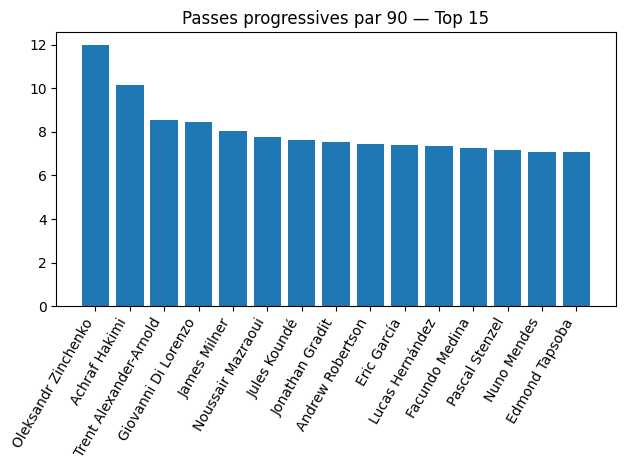

In [11]:
cand_prgp = [c for c in df.columns if ('prgp' in c.lower() or 'progressive pass' in c.lower()) and ('per_90' in c.lower() or 'per90' in c.lower() or '/90' in c.lower())]
if cand_prgp:
    top = df.sort_values(cand_prgp[0], ascending=False).head(15)
    plt.figure()
    plt.bar(top['Player'], top[cand_prgp[0]])
    plt.xticks(rotation=60, ha='right')
    plt.title('Passes progressives par 90 — Top 15')
    plt.tight_layout()
else:
    print('Pas de colonne passes progressives/90 détectée.')

## Notes
- Toutes les barres utilisent matplotlib par défaut.
- Remplace les détections automatiques d'intitulés si besoin.
